In [1]:
import pandas as pd
import sklearn
from scipy import misc
import cv2
import numpy as np 

# path = '/Users/fsaxena/Documents/UCL/Masters/IntroML1/AMLSassignment19_20/AMLS_19-20_SN14002056'
path = '/home/fsaxena/amls/AMLSassignment19_20/AMLS_19-20_SN14002056'


assignment_celeb = 'celeba'
assignment_cartoon = 'cartoon_set'

In [2]:
def data_loader(path_to_root, assignment):
    return pd.read_csv(path_to_root + '/Datasets/original_dataset_AMLS_19-20/' + assignment + '/labels.csv', sep='\t')
    

In [3]:
def convert_image_to_vector(file):
    img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
    return img

In [4]:
path_to_img=path+'/Datasets/original_dataset_AMLS_19-20/'+assignment_cartoon+'/img/1.png'
path_pre_img = path+'/Datasets/original_dataset_AMLS_19-20/'+assignment_celeb+'/img/'

In [5]:
np.array(convert_image_to_vector(path_to_img))

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [6]:
## Now need to add each raw pic to each part of the training set

In [7]:
celeb_dataframe = data_loader(path, assignment_celeb)
print(celeb_dataframe)

      Unnamed: 0  img_name  gender  smiling
0              0     0.jpg      -1        1
1              1     1.jpg      -1        1
2              2     2.jpg       1       -1
3              3     3.jpg      -1       -1
4              4     4.jpg      -1       -1
...          ...       ...     ...      ...
4995        4995  4995.jpg       1        1
4996        4996  4996.jpg       1        1
4997        4997  4997.jpg       1        1
4998        4998  4998.jpg       1        1
4999        4999  4999.jpg       1        1

[5000 rows x 4 columns]


In [8]:
vec_Array = []
for img_name in celeb_dataframe['img_name']:
    img_vec = np.array(convert_image_to_vector(path_pre_img + img_name))
    vec_Array.append(img_vec)

In [9]:
x_dataset = vec_Array
y_dataset = celeb_dataframe['gender']

In [10]:
# df = pd.DataFrame(data_Dict, columns = ['img_vec', 'gender'])

In [11]:
# df.head()

In [12]:
from sklearn.model_selection import train_test_split
 
x, X_test, y, y_test = train_test_split(
    x_dataset,
    y_dataset,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)

In [13]:
X_train = x
y_train = y

In [14]:
# X_train, X_val, y_train, y_val = train_test_split(
#     x,
#     y,
#     test_size=0.25,
#     shuffle=True,
#     random_state=42,
# )

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from skimage import color

from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([color.rgb2gray(img) for img in X])
 
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [16]:
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(8, 8),
    cells_per_block=(2,2),
    orientations=9,
    block_norm='L2-Hys'
)
scalify = StandardScaler()

In [17]:
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)


X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

(4000, 19656)


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   29.7s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:   35.8s remaining:   59.7s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:  1.0min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:  1.9min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  2.7min remaining:   53.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  3.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.3s finished


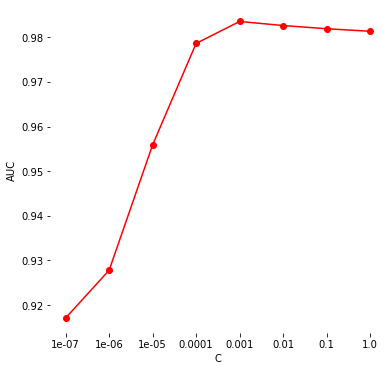

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 0.9835374149659863


In [21]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(LogisticRegression, paramGrid,
           X_train_prepared, y_train, X_test_prepared, y_test, 
           metric = roc_auc_score, scoreLabel = "AUC")
print(bestModel, bestScore)



-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    3.9s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    4.0s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    4.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    4.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.4s finished


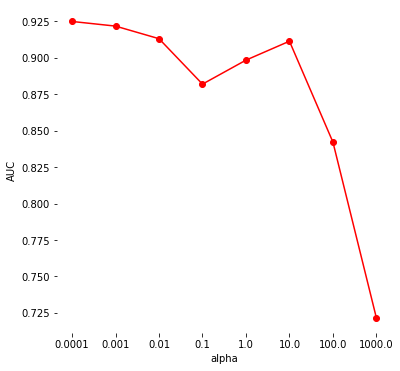

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 0.9249899959983994


In [30]:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['hinge'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores =  pf.bestFit(SGDClassifier, paramGrid, X_train_prepared, y_train, X_test_prepared, y_test, 
           metric = roc_auc_score, nfolds = 5, scoreLabel = "AUC")

print(bestModel, bestScore)

Logistic: ROC AUC=0.941


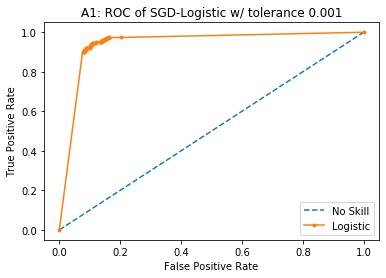

In [101]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

labels = np.array(['Male', 'Female'])


X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
ns_auc = roc_auc_score(testy, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

tolerance = 0.001

sgd_clf = SGDClassifier(random_state=42, loss='log', max_iter=1000, tol=tolerance, n_jobs = -1)
sgd_clf.fit(X_train_prepared, y_train)


lr_probs = sgd_clf.predict_proba(X_test_prepared)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title('A1: ROC of SGD-Logistic w/ tolerance ' + str(tolerance))
# show the plot
with open('A1/ROC_SGDlog_tolerance' + str(tolerance) + '.png', 'wb') as f:
    plt.savefig(f)


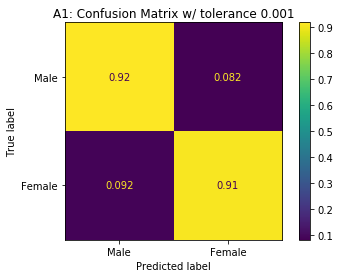

In [102]:
dsp = plot_confusion_matrix(sgd_clf, X_test_prepared, y_test, display_labels=labels, normalize='true')

plt.title("A1: Confusion Matrix w/ tolerance " + str(tolerance))

with open('A1/Confusion_MatrixSGDLog' + str(tolerance) + '.png', 'wb') as dsp:
    plt.savefig(dsp)

In [81]:
# X_val_gray = grayify.transform(X_val)
# X_val_hog = hogify.transform(X_val_gray)
# X_val_prepared = scalify.transform(X_val_hog)


In [55]:
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [57]:
y_test_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_test_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_test_pred == y_test)/len(y_test))

[ True False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]

Percentage correct:  92.5


In [58]:
from sklearn.pipeline import Pipeline
 
HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(8, 8),
        cells_per_block=(2,2),
        orientations=9,
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
print('Percentage correct: ', 100*np.sum(clf.predict(X_test) == y_test)/len(y_test))

Percentage correct:  92.5


In [59]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
    {'hogify__orientations': [9],
     'hogify__cells_per_block': [(3, 3)],
     'hogify__pixels_per_cell': [(14, 14)],
     'classify': [
#          SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
        svm.SVC(kernel='rbf', C=1),
        svm.SVC(kernel='rbf', C=10),
        svm.SVC(kernel='rbf', C=100)]}
]

In [60]:
grid_search = GridSearchCV(HOG_pipeline,
                           param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  4.8min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  8.7min finished


In [61]:
grid_res.best_estimator_

Pipeline(memory=None,
         steps=[('grayify', RGB2GrayTransformer()),
                ('hogify',
                 HogTransformer(block_norm='L2-Hys', cells_per_block=(3, 3),
                                orientations=9, pixels_per_cell=(14, 14),
                                y=None)),
                ('scalify',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classify',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [62]:
grid_res.best_score_

0.9202518020809549

In [63]:
grid_res.best_params_

{'classify': SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'hogify__cells_per_block': (3, 3),
 'hogify__orientations': 9,
 'hogify__pixels_per_cell': (14, 14)}

In [64]:
best_pred = grid_res.predict(X_test)
print('Percentage correct: ', 100*np.sum(best_pred == y_test)/len(y_test))

Percentage correct:  93.6


In [46]:
from sklearn.metrics import confusion_matrix

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(6)) for a in ax]
    [a.set_yticks(range(6)) for a in ax]
 
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1)
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
 

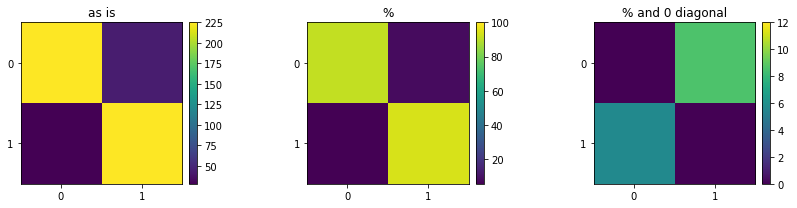

In [66]:
cmx_svm = confusion_matrix(y_test, best_pred)


plot_confusion_matrix(cmx_svm, vmax1=225, vmax2=100, vmax3=12)